# Right-sizing Files for Snowflake Ingestion using Coiled

In this example we want to explore the feasibility and value in right-sizing files appropriately prior to ingesting into Snowflake and using [Coiled](https://www.coiled.io/]) to do so. This is a topic frequently discussed, but there are limited solutions normally provided aside from the `split` utility with Linux or macOS, which would only work for text files. 

# Coiled

For setting up this demo, Coiled was used to scale Python and split these files up into smaller partitions using Dask. These file optimizations and write operations were performed using 10 workers and providing 64 GiB of worker memory. Coiled appropriately configures and prioritizes [compatible instance types](https://docs.coiled.io/user_guide/tutorials/select_instance_types.html) based on memory and CPU specification. 

When the initial files were read using Dask there were massive partitions and inefficient data types. These partitions and data types were optimized following a strategy discussed in https://github.com/mrocklin/nyc-taxi/blob/main/notebook.ipynb and in [this video](https://www.youtube.com/watch?v=6EozEvfTcBI&ab_channel=Coiled). 

To demonstrate the value in converting the datatypes in Pandas, please see the following table comparing before and after:

| filename                       | raw_file_size   | default_pandas_file_size   | optimized_pandas_file_size   |
|:-------------------------------|:----------------|:---------------------------|:-----------------------------|
| fhvhv_tripdata_2019-02.parquet | 489.29 MiB      | 10.85 GiB                  | 2.13 GiB                     |
| fhvhv_tripdata_2019-03.parquet | 582.56 MiB      | 12.88 GiB                  | 2.53 GiB                     |
| fhvhv_tripdata_2019-04.parquet | 533.73 MiB      | 11.82 GiB                  | 2.31 GiB                     |
| fhvhv_tripdata_2019-05.parquet | 544.38 MiB      | 12.29 GiB                  | 2.37 GiB                     |
| fhvhv_tripdata_2019-06.parquet | 511.35 MiB      | 11.97 GiB                  | 2.22 GiB                     |
| fhvhv_tripdata_2019-07.parquet | 492.10 MiB      | 11.27 GiB                  | 2.15 GiB                     |
| fhvhv_tripdata_2019-08.parquet | 478.21 MiB      | 11.17 GiB                  | 2.13 GiB                     |
| fhvhv_tripdata_2019-09.parquet | 492.04 MiB      | 11.15 GiB                  | 2.12 GiB                     |
| fhvhv_tripdata_2019-10.parquet | 523.92 MiB      | 11.74 GiB                  | 2.23 GiB                     |
| fhvhv_tripdata_2019-11.parquet | 535.02 MiB      | 12.02 GiB                  | 2.29 GiB                     |
| fhvhv_tripdata_2019-12.parquet | 549.94 MiB      | 12.35 GiB                  | 2.35 GiB                     |
| fhvhv_tripdata_2020-01.parquet | 506.66 MiB      | 11.41 GiB                  | 2.17 GiB                     |
| fhvhv_tripdata_2020-02.parquet | 532.98 MiB      | 12.06 GiB                  | 2.30 GiB                     |
| fhvhv_tripdata_2020-03.parquet | 330.43 MiB      | 7.44 GiB                   | 1.42 GiB                     |
| fhvhv_tripdata_2020-04.parquet | 109.52 MiB      | 2.46 GiB                   | 467.12 MiB                   |
| fhvhv_tripdata_2020-05.parquet | 153.11 MiB      | 3.38 GiB                   | 658.75 MiB                   |
| fhvhv_tripdata_2020-06.parquet | 188.80 MiB      | 4.18 GiB                   | 815.54 MiB                   |
| fhvhv_tripdata_2020-07.parquet | 248.20 MiB      | 5.53 GiB                   | 1.05 GiB                     |
| fhvhv_tripdata_2020-08.parquet | 276.99 MiB      | 6.16 GiB                   | 1.17 GiB                     |
| fhvhv_tripdata_2020-09.parquet | 300.11 MiB      | 6.73 GiB                   | 1.28 GiB                     |
| fhvhv_tripdata_2020-10.parquet | 329.19 MiB      | 7.57 GiB                   | 1.40 GiB                     |
| fhvhv_tripdata_2020-11.parquet | 287.87 MiB      | 6.44 GiB                   | 1.23 GiB                     |
| fhvhv_tripdata_2020-12.parquet | 289.22 MiB      | 6.46 GiB                   | 1.23 GiB                     |
| fhvhv_tripdata_2021-01.parquet | 294.61 MiB      | 6.62 GiB                   | 1.26 GiB                     |
| fhvhv_tripdata_2021-02.parquet | 288.61 MiB      | 6.44 GiB                   | 1.23 GiB                     |
| fhvhv_tripdata_2021-03.parquet | 351.31 MiB      | 7.90 GiB                   | 1.50 GiB                     |
| fhvhv_tripdata_2021-04.parquet | 351.35 MiB      | 7.84 GiB                   | 1.49 GiB                     |
| fhvhv_tripdata_2021-05.parquet | 369.31 MiB      | 8.18 GiB                   | 1.56 GiB                     |
| fhvhv_tripdata_2021-06.parquet | 375.86 MiB      | 8.31 GiB                   | 1.58 GiB                     |
| fhvhv_tripdata_2021-07.parquet | 377.62 MiB      | 8.34 GiB                   | 1.59 GiB                     |
| fhvhv_tripdata_2021-08.parquet | 364.62 MiB      | 8.04 GiB                   | 1.53 GiB                     |
| fhvhv_tripdata_2021-09.parquet | 375.45 MiB      | 8.26 GiB                   | 1.57 GiB                     |
| fhvhv_tripdata_2021-10.parquet | 410.19 MiB      | 9.19 GiB                   | 1.75 GiB                     |
| fhvhv_tripdata_2021-11.parquet | 392.02 MiB      | 8.92 GiB                   | 1.70 GiB                     |
| fhvhv_tripdata_2021-12.parquet | 391.90 MiB      | 8.92 GiB                   | 1.70 GiB                     |
| fhvhv_tripdata_2022-01.parquet | 357.26 MiB      | 8.20 GiB                   | 1.56 GiB                     |
| fhvhv_tripdata_2022-02.parquet | 388.29 MiB      | 8.89 GiB                   | 1.69 GiB                     |
| fhvhv_tripdata_2022-03.parquet | 449.40 MiB      | 10.24 GiB                  | 1.95 GiB                     |
| fhvhv_tripdata_2022-04.parquet | 434.45 MiB      | 9.86 GiB                   | 1.88 GiB                     |
| fhvhv_tripdata_2022-05.parquet | 446.86 MiB      | 10.09 GiB                  | 1.92 GiB                     |
| fhvhv_tripdata_2022-06.parquet | 436.97 MiB      | 9.88 GiB                   | 1.88 GiB                     |
| fhvhv_tripdata_2022-07.parquet | 423.17 MiB      | 9.70 GiB                   | 1.85 GiB                     |
| fhvhv_tripdata_2022-08.parquet | 416.31 MiB      | 9.55 GiB                   | 1.82 GiB                     |
| fhvhv_tripdata_2022-09.parquet | 436.79 MiB      | 9.88 GiB                   | 1.88 GiB                     |

The writes themselves were performed using: 

```
name_function = lambda x: f"fhvhv_tripdata_{x}.parquet"
df.to_parquet(path="s3://bucketname/size/", engine="pyarrow", compression="snappy", name_function=name_function)
```

After optimization, these files were written to an S3 bucket based on the following partitioning strategy:
- `df.repartition(partition_size="128MB")`
    - output_size: ~33 MiB
    - coiled_write_time: ~41 seconds
- `df.repartition(partition_size="256MB")`
    - output_size: ~70 MiB
    - coiled_write_time: ~34 seconds
- `df.repartition(partition_size="512MB")`
    - output_size: ~141 MiB
    - coiled_write_time: ~37 seconds
- `df.repartition(partition_size="1024MB")`
    - output_size: ~272 MiB
    - coiled_write_time: 53 seconds
- Lastly, the initial source dataset was also written to S3 without any optimization or partitioning as a baseline. 

## Snowflake

With these files in different folders in S3, [Snowflake was configured to securely access S3](https://docs.snowflake.com/en/user-guide/data-load-s3-config.html). 

A new database was created and schemas were created representing each type of file the schema was intended to work with. These were named in size guidance similar to that of our warehouses, but mostly as a way to describe the partition sizes mentioned above. The XSMALL schema would contain an external stage for the ~33 MiB files, the SMALL schema would contain an external stage for the ~70 MiB files, the RAW schema would represent an external stage to the unmodified files.

```
CREATE DATABASE IF NOT EXISTS FHVHV;
CREATE SCHEMA IF NOT EXISTS XSMALL;
CREATE SCHEMA IF NOT EXISTS SMALL;
CREATE SCHEMA IF NOT EXISTS MEDIUM;
CREATE SCHEMA IF NOT EXISTS LARGE;
CREATE SCHEMA IF NOT EXISTS RAW;
```

Each of these schemas would have a table created for landing data with types inferred using [`INFER_SCHEMA`](https://docs.snowflake.com/en/sql-reference/functions/infer_schema.html). 

```
CREATE OR REPLACE TABLE XSMALL.HVFHV (
        "hvfhs_license_num" TEXT,
        "dispatching_base_num" TEXT,
        "originating_base_num" TEXT,
        "request_datetime" NUMBER(38, 0),
        "on_scene_datetime" NUMBER(38, 0),
        "pickup_datetime" NUMBER(38, 0),
        "dropoff_datetime" NUMBER(38, 0),
        "PULocationID" NUMBER(38, 0),
        "DOLocationID" NUMBER(38, 0),
        "trip_miles" REAL,
        "trip_time" NUMBER(38, 0),
        "base_passenger_fare" REAL,
        "tolls" REAL,
        "bcf" REAL,
        "sales_tax" REAL,
        "congestion_surcharge" REAL,
        "airport_fee" TEXT,
        "tips" REAL,
        "driver_pay" REAL,
        "shared_request_flag" TEXT,
        "shared_match_flag" TEXT,
        "access_a_ride_flag" TEXT,
        "wav_request_flag" TEXT,
        "wav_match_flag" TEXT,
        "__null_dask_index__" NUMBER(38, 0)
    );
```

While it's interesting to explore different loading times by these varying file sizes, I also wanted to explore how the behavior changes by scaling up virtual warehouses. 

Before each load in its respective area, the table needed to be truncated to ensure no additional overhead with the table writes. After each load, the table was truncated and the warehouse was suspended for cache removal and to evaluate any provisioning delays when scaling up the warehouse. There was only one occasion where there was a noticeable delay in provisioning and this was after altering the warehouse to a 4X-Large. 

![warehouse queuing](./query_history.png)

The query used to ingest these files looks like this:
```
COPY INTO HVFHV
FROM @FHVHV_DATA
MATCH_BY_COLUMN_NAME = CASE_INSENSITIVE;
```

**We are ingesting 17.01 GiB with each of these loads.**

### Result Evaluation

#### Import the libraries we'll want to use to make this easier.

In [1]:
import pandas as pd
from dask.utils import format_bytes
from humanfriendly import format_timespan
from snowflake.snowpark import Session
from snowflake.snowpark.functions import col
import json

#### Establish a Snowpark session to query our history and perform the evaluation.

When working locally, I like to keep a configuration file handy that looks something like this. Be sure to add this to your .gitignore! 
```
{
    "SNOWFLAKE_CONNECTION":
    {
        "account": "your_account",
        "user": "whoami",
        "password": "password",
        "warehouse": "COMPUTE_WH",
        "role": "SYSADMIN"
    }
}
```

In [2]:
session = Session.builder.configs(
    json.loads(open("secrets.json").read())["SNOWFLAKE_CONNECTION"]
).create()

session.use_database("FHVHV")

We can write our queries in a way that is similar to using the Spark API. Snowpark DataFrames are lazily evaluated, so we'll have to use a method to return this shortly.

In [3]:
snowpark_df = (
    session.sql(
        "SELECT * FROM TABLE(INFORMATION_SCHEMA.QUERY_HISTORY(RESULT_LIMIT=>1000))"
    )
    .filter(col("QUERY_TYPE") == "COPY")
    .select("QUERY_TEXT", "QUERY_TYPE", "WAREHOUSE_SIZE", "EXECUTION_TIME")
)

Running an explain on our Snowpark DataFrame will show us the queries used to execute this as well as the query execution plan. 

In [4]:
snowpark_df.explain()

---------DATAFRAME EXECUTION PLAN----------
Query List:
1.
SELECT "QUERY_TEXT", "QUERY_TYPE", "WAREHOUSE_SIZE", "EXECUTION_TIME" FROM ( SELECT  *  FROM (SELECT * FROM TABLE(INFORMATION_SCHEMA.QUERY_HISTORY(RESULT_LIMIT=>1000))) WHERE ("QUERY_TYPE" = 'COPY'))
Logical Execution Plan:
GlobalStats:
    partitionsTotal=0
    partitionsAssigned=0
    bytesAssigned=0
Operations:
1:0     ->Result  QUERY_HISTORY.QUERY_TEXT, QUERY_HISTORY.QUERY_TYPE, QUERY_HISTORY.WAREHOUSE_SIZE, QUERY_HISTORY.EXECUTION_TIME  
1:1          ->InternalObject  INFORMATION_SCHEMA.QUERY_HISTORY  

--------------------------------------------


We can convert this Snowpark DataFrame to a Pandas DataFrame by doing the following. This will trigger the evaluation. 

In [5]:
df = snowpark_df.to_pandas()

Preview the data. 

In [6]:
df.head(5)

,QUERY_TEXT,QUERY_TYPE,WAREHOUSE_SIZE,EXECUTION_TIME
0,COPY INTO RAW.HVFHV\nFROM @RAW.FHVHV_DATA\nMAT...,COPY,4X-Large,424751
1,COPY INTO RAW.HVFHV\nFROM @RAW.FHVHV_DATA\nMAT...,COPY,3X-Large,443379
2,COPY INTO RAW.HVFHV\nFROM @RAW.FHVHV_DATA\nMAT...,COPY,2X-Large,438142
3,COPY INTO RAW.HVFHV\nFROM @RAW.FHVHV_DATA\nMAT...,COPY,X-Large,458516
4,COPY INTO RAW.HVFHV\nFROM @RAW.FHVHV_DATA\nMAT...,COPY,Large,443698


Our execution time is represented in milliseconds from QUERY_HISTORY. We need to convert this into seconds. 

In [7]:
df["EXECUTION_TIME"] = df["EXECUTION_TIME"] / 1000
df["FRIENDLY_EXECUTION_TIME"] = df["EXECUTION_TIME"].apply(format_timespan)

Creating a new DataFrame to join based on the file counts and average file sizes associated with each stage and query being used. [`format_timestamp`](`https://humanfriendly.readthedocs.io/en/latest/api.html?highlight=format_timespan#humanfriendly.format_timespan`) is being used to make seconds easier to interpret. 

In [8]:
stage_info = pd.DataFrame(
    {
        "QUERY_TEXT": [
            "COPY INTO XSMALL.HVFHV\nFROM @XSMALL.FHVHV_DATA\nMATCH_BY_COLUMN_NAME = CASE_INSENSITIVE;",
            "COPY INTO SMALL.HVFHV\nFROM @SMALL.FHVHV_DATA\nMATCH_BY_COLUMN_NAME = CASE_INSENSITIVE;",
            "COPY INTO MEDIUM.HVFHV\nFROM @MEDIUM.FHVHV_DATA\nMATCH_BY_COLUMN_NAME = CASE_INSENSITIVE;",
            "COPY INTO LARGE.HVFHV\nFROM @LARGE.FHVHV_DATA\nMATCH_BY_COLUMN_NAME = CASE_INSENSITIVE;",
            "COPY INTO RAW.HVFHV\nFROM @RAW.FHVHV_DATA\nMATCH_BY_COLUMN_NAME = CASE_INSENSITIVE;",
        ],
        "FILE_COUNT": [655, 328, 170, 90, 44],
        "AVG_FILE_SIZE": [
            34663239.528244,
            74162382.161585,
            148338542.170588,
            285990812.288889,
            415092370.090909,
        ],
    }
)

stage_info["AVG_FILE_SIZE"] = stage_info["AVG_FILE_SIZE"].apply(format_bytes)

In [9]:
stage_info

,QUERY_TEXT,FILE_COUNT,AVG_FILE_SIZE
0,COPY INTO XSMALL.HVFHV\nFROM @XSMALL.FHVHV_DAT...,655,33.06 MiB
1,COPY INTO SMALL.HVFHV\nFROM @SMALL.FHVHV_DATA\...,328,70.73 MiB
2,COPY INTO MEDIUM.HVFHV\nFROM @MEDIUM.FHVHV_DAT...,170,141.47 MiB
3,COPY INTO LARGE.HVFHV\nFROM @LARGE.FHVHV_DATA\...,90,272.74 MiB
4,COPY INTO RAW.HVFHV\nFROM @RAW.FHVHV_DATA\nMAT...,44,395.86 MiB


In [10]:
df = df.merge(stage_info, on="QUERY_TEXT")
df.drop(columns=["QUERY_TEXT"], inplace=True)

Creating another DataFrame for joining to calcuate the execution time cost of each warehouse. To learn more about this pricing, Andrew Reichman has written a great post about it: [How Usage-Based Pricing Delivers a Budget-Friendly Cloud Data Warehouse](https://www.snowflake.com/blog/how-usage-based-pricing-delivers-a-budget-friendly-cloud-data-warehouse/). 

In [11]:
warehouse_credits = pd.DataFrame(
    {
        "WAREHOUSE_SIZE": [
            "X-Small",
            "Small",
            "Medium",
            "Large",
            "X-Large",
            "2X-Large",
            "3X-Large",
            "4X-Large",
        ],
        "CREDITS_PER_HOUR": [1, 2, 4, 8, 16, 32, 64, 128],
    }
)

In my case, I'm using Standard Edition, so I'll need to multiply this value by 2 to calculate the compute costs. 

In [12]:
warehouse_credits["COMPUTE_COST_PER_SECOND_USD"] = (
    warehouse_credits["CREDITS_PER_HOUR"] / 3600 * 2
)

In [13]:
warehouse_credits

,WAREHOUSE_SIZE,CREDITS_PER_HOUR,COMPUTE_COST_PER_SECOND_USD
0,X-Small,1,0.000556
1,Small,2,0.001111
2,Medium,4,0.002222
3,Large,8,0.004444
4,X-Large,16,0.008889
5,2X-Large,32,0.017778
6,3X-Large,64,0.035556
7,4X-Large,128,0.071111


In [14]:
df = df.merge(warehouse_credits, on="WAREHOUSE_SIZE")

Creating an additional column to calculate the execution time cost. It's important to note, the minimum billing charge for provisioning the compute resources is 1 minute, so I'll be adjusting these accordingly. 

[How are Credits Charged for Warehouses?](https://docs.snowflake.com/en/user-guide/warehouses-considerations.html#how-are-credits-charged-for-warehouses)

In [15]:
import numpy as np

df["EXECUTION_TIME_COST_USD"] = np.where(
    df["EXECUTION_TIME"] <= 60,
    60 * df["COMPUTE_COST_PER_SECOND_USD"],
    df["EXECUTION_TIME"] * df["COMPUTE_COST_PER_SECOND_USD"],
)

Preview our data and sort to demonstrate starting from a smaller warehouse and from the larger sets of files to larger warehouses and smaller sets of files. 

This will help demonstrate the value of "right-sizing" our virtual warehouses as well as properly preparing our files. 

### ⚠️ Remember, the 44 count and 395.86 MiB files have not been optimized. These files are as-is.

In [16]:
df.sort_values(by=["CREDITS_PER_HOUR", "FILE_COUNT"], ascending=True).reset_index(
    drop=True
)

,QUERY_TYPE,WAREHOUSE_SIZE,EXECUTION_TIME,FRIENDLY_EXECUTION_TIME,FILE_COUNT,AVG_FILE_SIZE,CREDITS_PER_HOUR,COMPUTE_COST_PER_SECOND_USD,EXECUTION_TIME_COST_USD
0,COPY,X-Small,1747.219,29 minutes and 7.22 seconds,44,395.86 MiB,1,0.000556,0.970677
1,COPY,X-Small,1715.120,28 minutes and 35.12 seconds,90,272.74 MiB,1,0.000556,0.952844
2,COPY,X-Small,1624.533,27 minutes and 4.53 seconds,170,141.47 MiB,1,0.000556,0.902518
3,COPY,X-Small,1631.465,27 minutes and 11.46 seconds,328,70.73 MiB,1,0.000556,0.906369
4,COPY,X-Small,1593.915,26 minutes and 33.91 seconds,655,33.06 MiB,1,0.000556,0.885508
5,COPY,Small,974.855,16 minutes and 14.86 seconds,44,395.86 MiB,2,0.001111,1.083172
6,COPY,Small,926.723,15 minutes and 26.72 seconds,90,272.74 MiB,2,0.001111,1.029692
7,COPY,Small,862.363,14 minutes and 22.36 seconds,170,141.47 MiB,2,0.001111,0.958181
8,COPY,Small,841.509,14 minutes and 1.51 seconds,328,70.73 MiB,2,0.001111,0.935010
9,COPY,Small,837.228,13 minutes and 57.23 seconds,655,33.06 MiB,2,0.001111,0.930253


Let's pivot to prepare a visualization of the execution times associated with warehouses and file sizes. 

In [17]:
pivot_time = df.pivot(
    index="WAREHOUSE_SIZE",
    columns=["FILE_COUNT", "AVG_FILE_SIZE"],
    values="EXECUTION_TIME",
)
pivot_time = pivot_time.reindex(
    [
        "X-Small",
        "Small",
        "Medium",
        "Large",
        "X-Large",
        "2X-Large",
        "3X-Large",
        "4X-Large",
    ],
    axis=0,
)

In [18]:
pivot_time

FILE_COUNT,44,90,170,328,655
AVG_FILE_SIZE,395.86 MiB,272.74 MiB,141.47 MiB,70.73 MiB,33.06 MiB
WAREHOUSE_SIZE,,,,,
X-Small,1747.219,1715.120,1624.533,1631.465,1593.915
Small,974.855,926.723,862.363,841.509,837.228
Medium,543.844,487.182,457.827,437.257,417.431
Large,443.698,315.766,246.554,240.146,226.698
X-Large,458.516,300.782,161.948,123.812,121.204
2X-Large,438.142,230.745,154.577,82.662,63.809
3X-Large,443.379,171.012,88.472,80.874,43.974
4X-Large,424.751,173.332,88.017,45.723,42.857


Plot it! Remember, lower is better here as we're talking about query duration.

<AxesSubplot: title={'center': 'Snowflake COPY INTO Execution Time by Warehouse Size and "Right-Sized" Files'}, xlabel='Warehouse Size', ylabel='Execution Time (seconds)'>

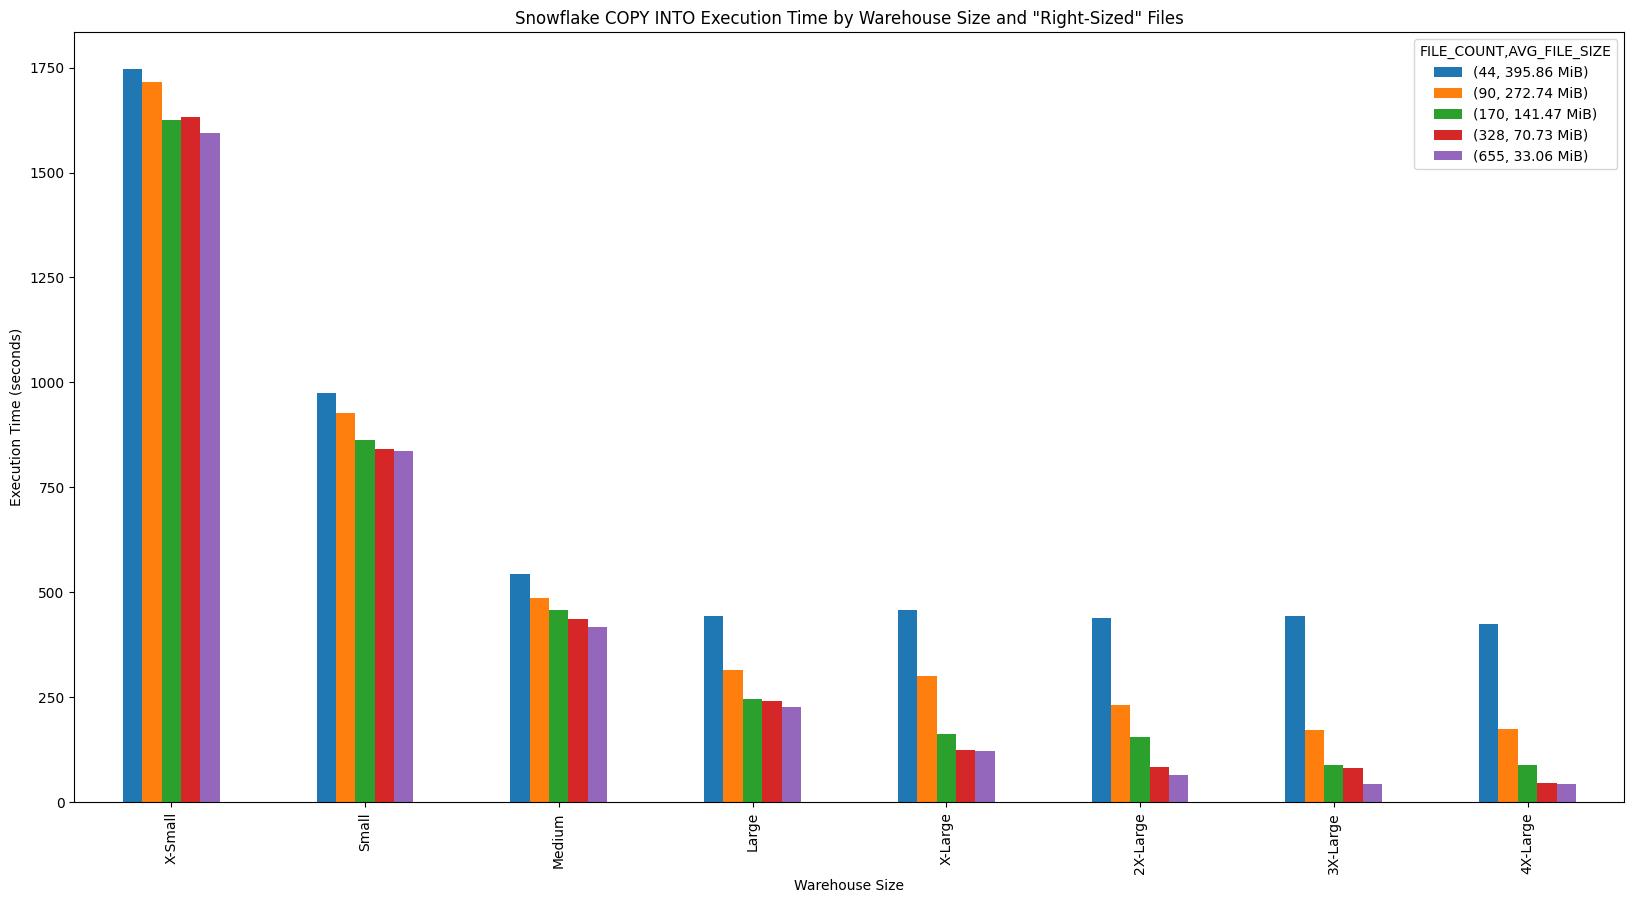

In [19]:
pivot_time.plot(
    kind="bar",
    figsize=(20, 10),
    ylabel="Execution Time (seconds)",
    xlabel="Warehouse Size",
    title='Snowflake COPY INTO Execution Time by Warehouse Size and "Right-Sized" Files',
)

Let's pivot again to prepare a visualization of the cost associated with warehouses and file sizes. 

In [20]:
pivot_cost = df.pivot(
    index="WAREHOUSE_SIZE",
    columns=["FILE_COUNT", "AVG_FILE_SIZE"],
    values="EXECUTION_TIME_COST_USD",
)
pivot_cost = pivot_cost.reindex(
    [
        "X-Small",
        "Small",
        "Medium",
        "Large",
        "X-Large",
        "2X-Large",
        "3X-Large",
        "4X-Large",
    ],
    axis=0,
)

In [21]:
pivot_cost

FILE_COUNT,44,90,170,328,655
AVG_FILE_SIZE,395.86 MiB,272.74 MiB,141.47 MiB,70.73 MiB,33.06 MiB
WAREHOUSE_SIZE,,,,,
X-Small,0.970677,0.952844,0.902518,0.906369,0.885508
Small,1.083172,1.029692,0.958181,0.935010,0.930253
Medium,1.208542,1.082627,1.017393,0.971682,0.927624
Large,1.971991,1.403404,1.095796,1.067316,1.007547
X-Large,4.075698,2.673618,1.439538,1.100551,1.077369
2X-Large,7.789191,4.102133,2.748036,1.469547,1.134382
3X-Large,15.764587,6.080427,3.145671,2.875520,2.133333
4X-Large,30.204516,12.325831,6.258987,4.266667,4.266667


Plot it... again! Remember, lower is still better here as we're talking about cost, but there may be value in paying more in order to have the query complete sooner. 

<AxesSubplot: title={'center': 'Snowflake COPY INTO Execution Time Cost by Warehouse Size and "Right-Sized" Files'}, xlabel='Warehouse Size', ylabel='Execution Time Cost (USD)'>

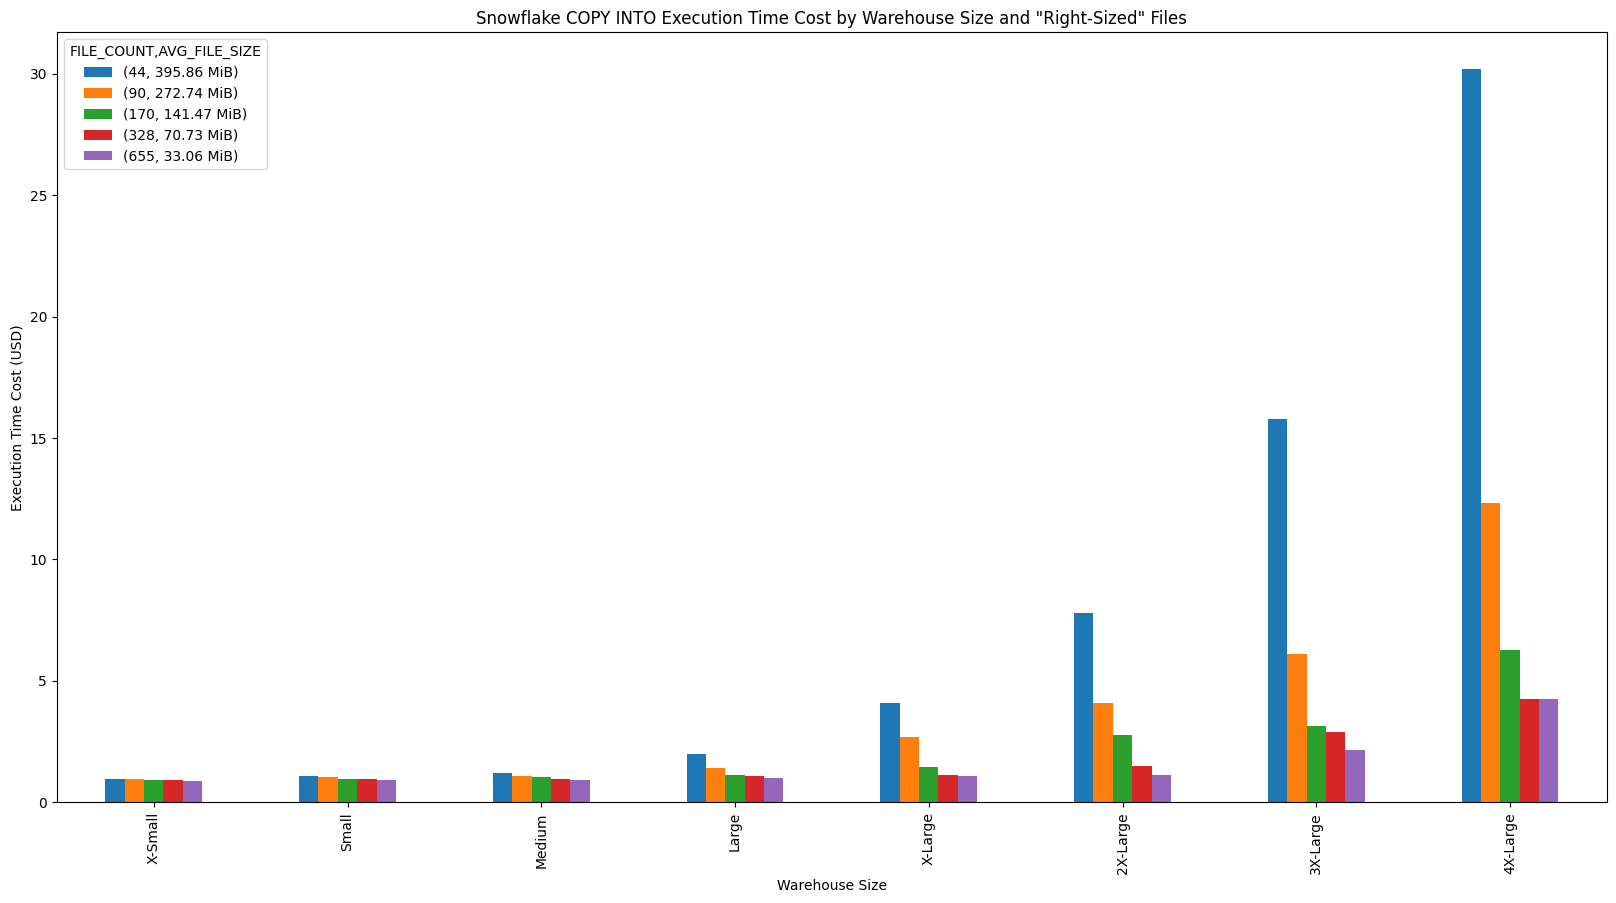

In [22]:
pivot_cost.plot(
    kind="bar",
    figsize=(20, 10),
    ylabel="Execution Time Cost (USD)",
    xlabel="Warehouse Size",
    title='Snowflake COPY INTO Execution Time Cost by Warehouse Size and "Right-Sized" Files',
)

### Conclusion

We're working with a fair amount of data here and we're landing it all at one time to persist in a Snowflake table. 

As you can see, the absolute cheapest option here would be to use an X-Small warehouse with the ~33 MiB files. Unfortunately, we were having to wait for 26 minutes and 34 seconds for this load to complete. This load costs $0.89. On the other hand, if we're looking at the absolute fastest option, it seems that the 4X-Large warehouse does achieve this once again using the ~33 MiB files, only having to wait for 43 seconds. This load costs $4.27. 

Trying to identify that "sweet spot" it seems we would want to look at trying to meet cost and speed in the middle. It seems that the ~33 MiB files are our best bet and using a Medium warehouse this load takes 6 minutes and 57 seconds and costs costs $0.93. 

I noticed I also brought along an extra column `__null_dask_index__` which came from the parquet write with `write_index` being left to True. 

#### **Ultimately, this demonstrates that it is a great idea to ensure files are being right-sized appropriately in your data pipelines.** Snowflake [documentation](https://docs.snowflake.com/en/user-guide/data-load-considerations-prepare.html#file-sizing-best-practices-and-limitations) specifies this as well. 

[Coiled](https://www.coiled.io/) works as a great solution for this as workers can be scaled reliably as needed and could be triggered from cloud storage events. Once the files have been optimized and written, a [Snowpipe](https://docs.snowflake.com/en/user-guide/data-load-snowpipe-auto-s3.html) could be used to automatically perform this ingestion. 

### Extras?

Now that our data is in a Snowflake table we're able to operate on it with Snowflake's [Micro-partitions & Data Clustering](https://docs.snowflake.com/en/user-guide/tables-clustering-micropartitions.html). We can quickly explore some of this using Snowpark.

We can determine the shortest and longest trip distance using simple aggregations.

In [23]:
from snowflake.snowpark.functions import min, max

session.table("RAW.HVFHV").select(min('"trip_miles"'), max('"trip_miles"')).show()

-------------------------------------------------
|"MIN(""TRIP_MILES"")"  |"MAX(""TRIP_MILES"")"  |
-------------------------------------------------
|0.0                    |1310.51                |
-------------------------------------------------



What about grouping? Do these values differ based on a day of the week of the request_datetime?

I noticed the dates were loaded as EPOCH time from the parquet inference, we can convert this to a date column using to_date with a cast.

In [24]:
from snowflake.snowpark.functions import dayname, to_date, cast
from snowflake.snowpark.types import StringType

session.table("RAW.HVFHV").group_by(
    dayname(to_date(cast('"request_datetime"', StringType())))
).agg(min('"trip_miles"'), max('"trip_miles"')).show()

--------------------------------------------------------------------------------------
|"DAYNAME(TO_DATE(CAST(REQUEST_DATETIME)))"  |"MIN(TRIP_MILES)"  |"MAX(TRIP_MILES)"  |
--------------------------------------------------------------------------------------
|Sat                                         |0.0                |612.87             |
|Mon                                         |0.0                |738.95             |
|Fri                                         |0.0                |657.61             |
|NULL                                        |0.0                |42.86              |
|Tue                                         |0.0                |615.01             |
|Wed                                         |0.0                |1310.51            |
|Sun                                         |0.0                |628.7              |
|Thu                                         |0.0                |616.81             |
-------------------------------------------

We see that our longest trip took place on a Wednesday and that there may have been a value missing. Let's try to find these.

In [25]:
from snowflake.snowpark.functions import is_null

session.table("RAW.HVFHV").filter(is_null('"request_datetime"')).count()

108958

Thanks for reading!